In [64]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [65]:
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), ).type(torch.LongTensor)

x, y = Variable(x), Variable(y)

In [66]:
print torch.normal(torch.ones(10,2),1)

tensor([[-0.2430,  1.1610],
        [ 1.6023,  0.0346],
        [ 2.4270,  1.5197],
        [ 1.9553,  1.0048],
        [ 0.8155,  0.4571],
        [ 0.6173,  0.4369],
        [-0.1760, -0.7437],
        [ 1.9163,  0.2783],
        [ 1.0986,  1.2444],
        [ 0.1819,  2.7973]])


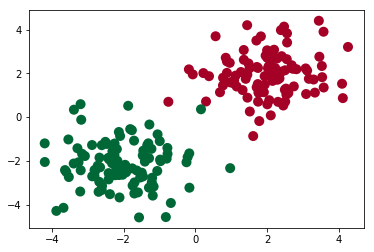

In [67]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [68]:
class Net(torch.nn.Module): # Remember to inherit torch.nn.Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__() # official step
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [69]:
net1 = Net(2, 10, 2)
print(net1)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


In [76]:
net2 = torch.nn.Sequential(
    torch.nn.Linear(2, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,2),
)
print net2

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)


In [77]:
optimizer = torch.optim.SGD(net2.parameters(), lr = 0.02)
loss_func = torch.nn.CrossEntropyLoss()

(tensor([0.8749, 0.3578], grad_fn=<MaxBackward0>), tensor([117,  99]))


/home/arg_ws3/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]
/home/arg_ws3/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


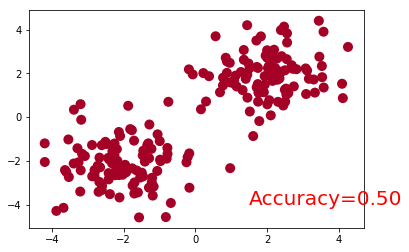

(tensor([0.7731, 0.4114], grad_fn=<MaxBackward0>), tensor([ 18, 124]))


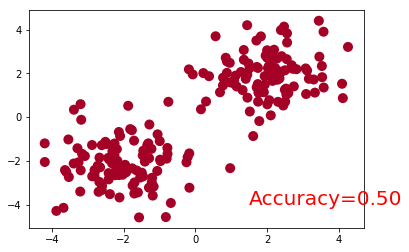

(tensor([0.7706, 0.6057], grad_fn=<MaxBackward0>), tensor([ 18, 110]))


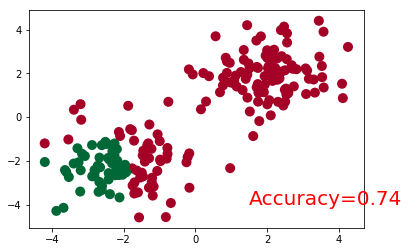

(tensor([0.7706, 0.7946], grad_fn=<MaxBackward0>), tensor([ 18, 110]))


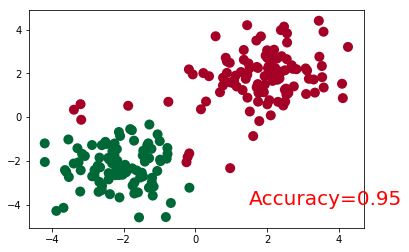

(tensor([0.7853, 0.9467], grad_fn=<MaxBackward0>), tensor([ 75, 110]))


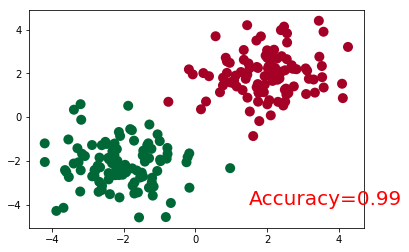

(tensor([0.8115, 0.9779], grad_fn=<MaxBackward0>), tensor([ 75, 110]))


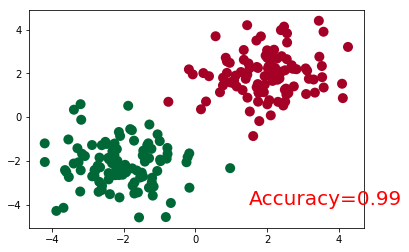

(tensor([0.8372, 0.9885], grad_fn=<MaxBackward0>), tensor([ 75, 110]))


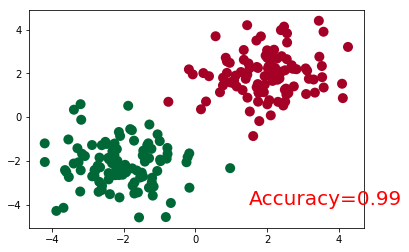

(tensor([0.8614, 0.9932], grad_fn=<MaxBackward0>), tensor([ 75, 110]))


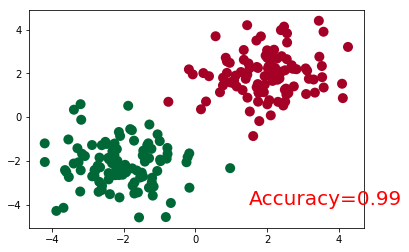

(tensor([0.8842, 0.9956], grad_fn=<MaxBackward0>), tensor([ 27, 110]))


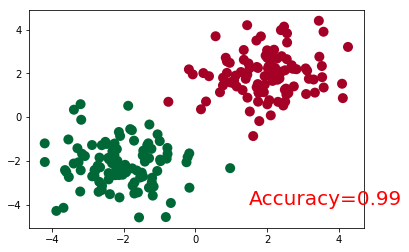

(tensor([0.9083, 0.9970], grad_fn=<MaxBackward0>), tensor([ 27, 110]))


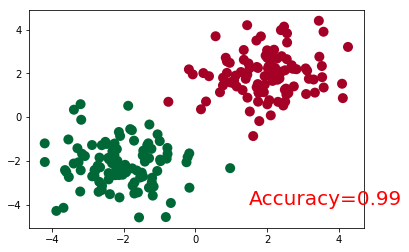

(tensor([0.9277, 0.9979], grad_fn=<MaxBackward0>), tensor([ 27, 110]))


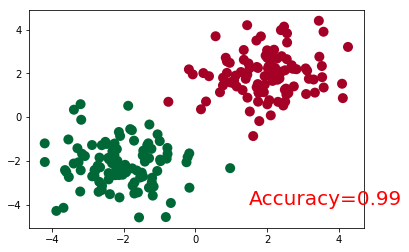

(tensor([0.9430, 0.9984], grad_fn=<MaxBackward0>), tensor([ 27, 110]))


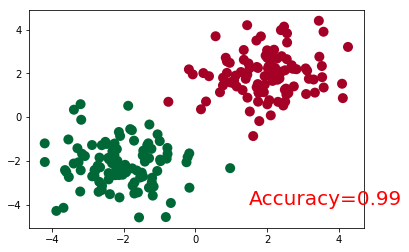

In [78]:
for t in range(100):
    out = net2(x)
    loss = loss_func(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #print torch.max(F.softmax(out), 1)[1]
    '''if t % 5 == 0:
        print loss.data[0]'''
    if t % 10 == 0 or t in [3, 6]:
        # plot and show learning process
        plt.cla()
        _, prediction = torch.max(F.softmax(out), 1)
        print torch.max(F.softmax(out), 0)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)
plt.ioff()